In [2]:
#note: temp readings are 20s apart

import pandas as pd
import os
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Normalization
import numpy as np

In [3]:
def allocate_data(training_files):
    dfs = {}
    for file in training_files:
        df = pd.read_excel(file, sheet_name="DATA", usecols='C,D', skiprows = 1)
        df.columns = ['temp', 'label']
        df.loc[df.shape[0]] = [None, None]# to ensure that there are breaks between each recorded shower
        dfs[file] = df
    data = pd.concat(list(dfs.values()), ignore_index = True)# concatenating all our data into one big dataframe
    return data

In [10]:
def train_model(data, model_type):
    if model_type == 'Start':
        window_size = 19
    elif model_type == 'End':
        window_size = 25
    #list where the first item is 1 for model_type and 0 for not model_type:
    pts = []

    for i, row in data.iterrows():
        if not pd.isnull(row['label']):
            if row['label'].startswith(model_type):
                pts.append([1] + data.iloc[i-window_size//2:i+window_size//2+1]['temp'].tolist())

    initial_length = len(pts)

    #taking a random sample of indices (without replacement) of size k
    random_indices = random.sample(range(len(data) - window_size), k = len(data) - window_size)

    i = 0
    for _ in range(initial_length):
        # none of the temp data can be null, and the midpoint can't be a pointed labeled with the model type.
        while any(pd.isnull(data.iloc[i:i+window_size]['temp'])) or (
            not pd.isnull(data.iloc[i+window_size//2]['label']) and data.iloc[i+window_size//2]['label'].startswith(model_type)
        ):
            i += 1
        pts.append([0] + data.iloc[i:i+window_size]['temp'].tolist())
        i += 1

    #tensors holding the label, followed by a list of 10 temperatures:
    data = np.asarray(pts)
    np.random.shuffle(data)

    model = Sequential(
        [
            BatchNormalization(),
            Dense(2**4, activation = 'relu', input_shape=(window_size,)),
            Dense(1, activation = 'sigmoid')
        ]
    )

    model.compile(
        loss='mse',
        metrics=['mae'],
        optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
    )

    model.fit(
        data[:,1:],
        data[:,0],
        epochs = int(4*1e5),
        verbose = 0
    )
    return model

In [5]:
def simulate(test_file, training_files):
    data = allocate_data(training_files)    
    start_model = train_model(data, 'Start')
    end_model = train_model(data, 'End')
    test_data = pd.read_excel(test_file, sheet_name="DATA", usecols='C,D', skiprows = 1)
    test_data.columns = ['temp', 'label']
    start_indices = []
    end_indices = []
    total_duration = sim_total_duration = shower_count = sim_shower_count = 0
    sim_start_indices = []
    sin_end_indices = []
    for i in range(test_data.shape[0]):
        if not pd.isnull(test_data['label'][i]):
            if test_data['label'][i].startswith('Start'):
                start_indices.append(i)
            elif test_data['label'][i].startswith('End'):
                end_indices.append(i)
                total_duration += i - start_indices[-1]
                shower_count += 1
    window_sizes = (19, 25)
    models = (start_model, end_model)
    index_lists = (sim_start_indices, sim_end_indices)
    Start = 0
    End = 1
    curr_test = Start
    #last point detected should be an end point, so we must allow enough space to run the end model at all points.
    for i in range(test_data.shape[0] - window_sizes[1] + 1):
        if models[curr_test] == 1
            

SyntaxError: invalid syntax (1698133245.py, line 12)

In [22]:
data = allocate_data(training_files)    
start_model = train_model(data, 'Start')
end_model = train_model(data, 'End')
test_data = pd.read_excel(test_file, sheet_name="DATA", usecols='C,D', skiprows = 1)
test_data.columns = ['temp', 'label']
start_indices = []
end_indices = []
total_duration = sim_total_duration = shower_count = sim_shower_count = 0
sim_start_indices = []
sim_end_indices = []



In [8]:
os.chdir('data_flattened')
files = os.listdir()

In [5]:
for i in range(len(files)):
    simulate(files[i], files[:i] + files[i+1:])

11

In [5]:
test_file = files[0]
test_data = pd.read_excel(test_file, sheet_name="DATA", usecols='C,D', skiprows = 1)
test_data.columns = ['temp', 'label']

In [12]:
for n in test_data['temp']:
    if pd.isnull(n):
        print(n)

In [21]:
test_data['label'].tolist().index('End')

366

In [24]:
[i for i,n in enumerate(test_data['label']) if n == 'Start'][1]

4788

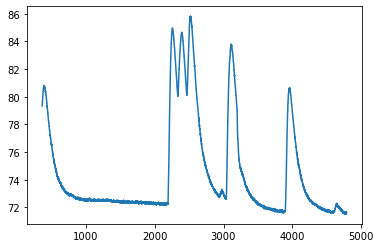

In [25]:
plt.plot(test_data['temp'][366:4788])

In [27]:
os.chdir('../data')

In [29]:
files = os.listdir()
print(files)

['.DS_Store', 'S19', 'F19 groundtruthed']


In [68]:
os.chdir('../F19 groundtruthed')

In [69]:
files = os.listdir()
print(files)

['Copy of South 20461369 2019-12-20 13_18_02 -0500.xlsx', 'Copy of South 20461369 2019-12-09 20_05_46 -0500.xlsx', 'Copy of Kahn noah400 2019-12-04 22_07_07 -0500.xlsx', '~$Copy of Dascomb 20461369 2019-12-02 18_07_58 -0500.xlsx', 'Copy of Noah noah400 2019-12-15 22_41_10 -0500.xlsx', 'Copy of Dascomb 20461369 2019-12-02 18_07_58 -0500.xlsx', 'Copy of Harkness 20461368 2019-12-02 17_36_48 -0500.xlsx']


In [73]:
test_data = pd.read_excel(test_file, sheet_name="DATA", skiprows = 1)

In [82]:
start_indices = [i for i, label in enumerate(test_data.iloc[:,3]) if str(label).startswith('Start')]
end_indices = [i for i, label in enumerate(test_data.iloc[:,3]) if str(label).startswith('End')]

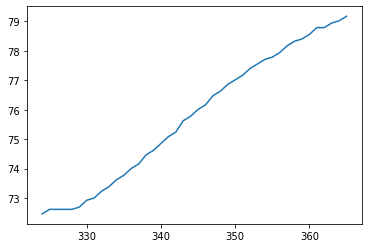

In [90]:
plt.plot(test_data.iloc[:,2][start_indices[0]:end_indices[0]])

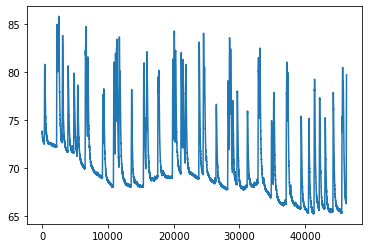

In [80]:
plt.plot(test_data.iloc[:,2])

In [70]:
test_file = files[0]
test_data = pd.read_excel(test_file, sheet_name="DATA", usecols='C,D', skiprows = 1)
test_data.columns = ['temp', 'label']

In [71]:
start_indices = [i for i, label in enumerate(test_data['label']) if str(label).startswith('Start')]

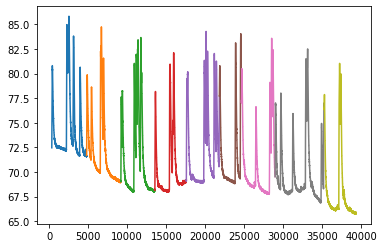

In [72]:
for i in range(len(start_indices) - 1):
    plt.plot(test_data['temp'][start_indices[i]:start_indices[i+1]])

In [95]:
files = os.listdir()

In [167]:
test_file = files[5]
test_data = pd.read_excel(test_file, sheet_name="DATA", skiprows = 1)

In [168]:
test_data

,#,"Date Time, GMT -0400","Temp, °F",Unnamed: 3,Unnamed: 4
0,NaN,NaT,NaN,NaN,NaN
1,NaN,NaT,NaN,NaN,NaN
2,NaN,NaT,NaN,NaN,NaN
3,NaN,NaT,NaN,NaN,NaN
4,NaN,NaT,NaN,NaN,NaN
...,...,...,...,...,...
18839,18840.0,2021-03-30 21:20:40,69.215387,NaN,NaN
18840,18841.0,2021-03-30 21:21:00,69.138166,NaN,NaN
18841,18842.0,2021-03-30 21:21:20,69.138166,NaN,NaN
18842,18843.0,2021-03-30 21:21:40,69.060945,NaN,NaN


In [169]:
i = 0
while pd.isnull(test_data.iloc[i,2]):
    i += 1

In [170]:
test_data = test_data.drop(index = range(i))

In [171]:
null_indices = [i for i, label in enumerate(test_data.iloc[:,2]) if pd.isnull(label)]

In [172]:
len(null_indices)

0

In [173]:
label_indices = [i for i, label in enumerate(test_data.iloc[:,3]) if not pd.isnull(label)]
print(label_indices)

[180, 255]


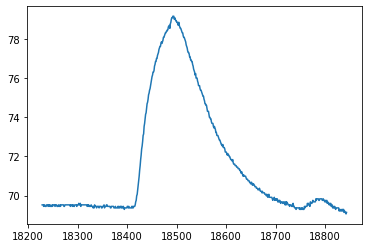

In [174]:
plt.plot(test_data.iloc[:,2])

In [175]:
test_data.iloc[label_indices[0],3] = 'Start'
test_data.iloc[label_indices[1],3] = 'End'

In [176]:
os.chdir('../new')

In [148]:
test_file

'south 2nd floor gender neutral wing with 203REDUCED.xlsx'

In [149]:
test_data.to_csv('south 2nd floor gender neutral wing with 203REDUCED.csv', index = False)

In [150]:
os.chdir('../REDUCED')